In [61]:
import pandas as pd
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [62]:
data = pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')

In [63]:
data.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [64]:
data.shape

(301, 8)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [66]:
data.isna().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

In [67]:
data['Previous Year Rank'] = data['Previous Year Rank'].fillna(0)

In [68]:
# S.NO column has no purpose for this project so I'll drop it

data.drop(['S.NO'], axis=1, inplace=True)

## Check for duplicates

In [69]:
data['Sport'].unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'Basketball',
       'Boxing', 'Auto Racing', 'Golf', 'Tennis', 'NFL', 'Auto racing',
       'NBA', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'tennis', 'ice hockey', 'F1 Motorsports', 'NASCAR', 'Hockey',
       'Auto Racing (Nascar)', 'F1 racing', 'American Football', 'soccer',
       'baseball', 'cycling', 'motorcycle gp', 'Soccer', 'MMA'],
      dtype=object)

#### Replace duplicates

In [70]:
data['Sport'] = data['Sport'].replace({'boxing': 'Boxing',
                                      'auto racing': 'Auto Racing',
                                      'golf': 'Golf',
                                      'basketball': 'Basketball',
                                      'tennis': 'Tennis',
                                      'soccer': 'Soccer',
                                      'baseball': 'Baseball',
                                      'cycling': 'Cycling',
                                      'motorcycle gp': 'Motorcycle GP',
                                      'NASCAR': 'Auto Racing (Nascar)',
                                      'Ice Hockey': 'Hockey',
                                      'ice hockey': 'Hockey',
                                      'NBA': 'Basketball',
                                      'NFL': 'Soccer',
                                      'American Football': 'Soccer',
                                      'Auto Racing (Nascar)': 'Auto Racing',
                                      'Auto racing': 'Auto Racing',})

#### Check 'Previous Year Rank' column and fix it.

In [71]:
data['Previous Year Rank'].unique()

array([0, '8', '1', '>30', '4', '5', '12', '6', '3', '9', '17', '13',
       '10', '>40', '19', '40', '7', '11', '30', '22', '20', 'not ranked',
       '38', '2', '15', '14', '26', 'none', '18', '>10', '>20', '?', '24',
       '21', '>14', '>100', '??'], dtype=object)

In [72]:
data['Previous Year Rank'] = data['Previous Year Rank'].replace({'>30': '30',
                                                               '>40': '40',
                                                               '>10': '10',
                                                               '>20': '20',
                                                               '>14': '14',
                                                               '>100': '100'})

In [73]:
data.drop(data.loc[data['Previous Year Rank']=='not ranked'].index, inplace=True)
data.drop(data.loc[data['Previous Year Rank']=='none'].index, inplace=True)
data.drop(data.loc[data['Previous Year Rank']=='?'].index, inplace=True)
data.drop(data.loc[data['Previous Year Rank']=='??'].index, inplace=True)

In [74]:
data['Previous Year Rank'].dtype

dtype('O')

In [75]:
pd.to_numeric(data['Previous Year Rank'], errors='coerce')

0        0
1        0
2        0
3        0
4        0
      ... 
296      9
297     10
298     11
299    100
300    100
Name: Previous Year Rank, Length: 291, dtype: int64

In [76]:
data.columns

Index(['Name', 'Nationality', 'Current Rank', 'Previous Year Rank', 'Sport',
       'Year', 'earnings ($ million)'],
      dtype='object')

# Explanatory Data Analysis

### column: 'Nationality'

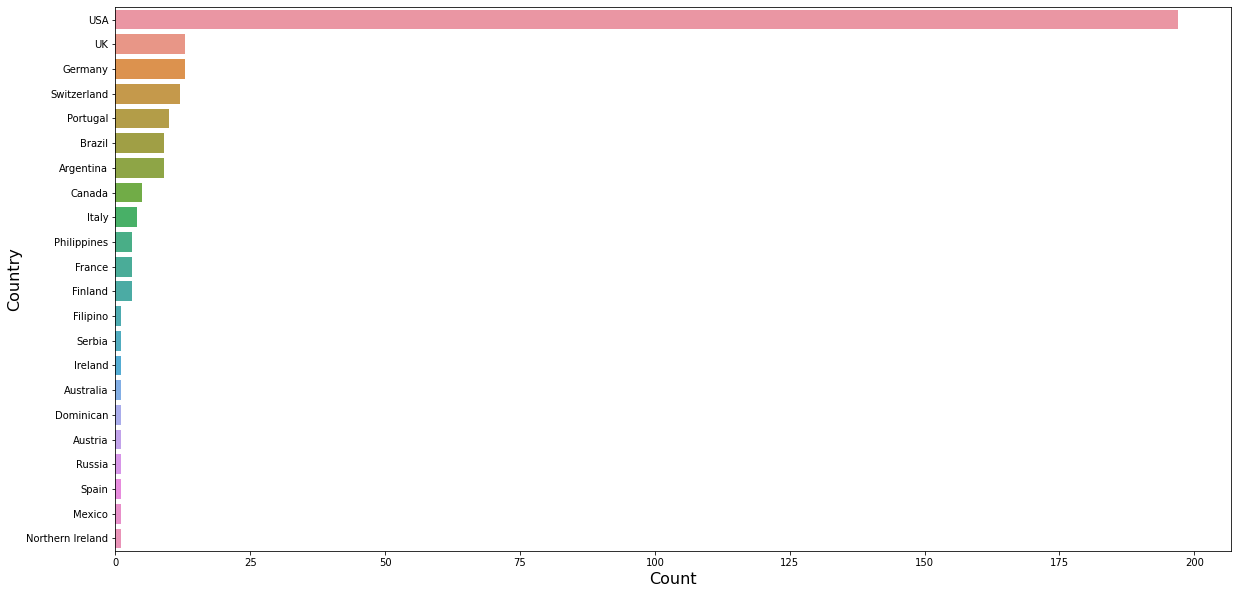

In [77]:
countries = data['Nationality'].value_counts()

countries_df = pd.DataFrame(list(countries.items()), columns=['Country', 'Count'])

plt.figure(figsize=(20, 10))
ax = sns.barplot(x="Count", y="Country", data=countries_df, ci=None)

plt.xlabel('Count', fontsize=16)
plt.ylabel('Country', fontsize=16)

plt.show()

Insights:
1. The majority of athletes are from the USA.
2. Here are the countries that have only 1 athlete in this list: Mexico, Serbia, Dominician, Northern Ireland, Australia, Russia, Fillipino, Spain, Ireland, Austria.
3. Germany and UK are in the 2nd place.

### column: Current Rank

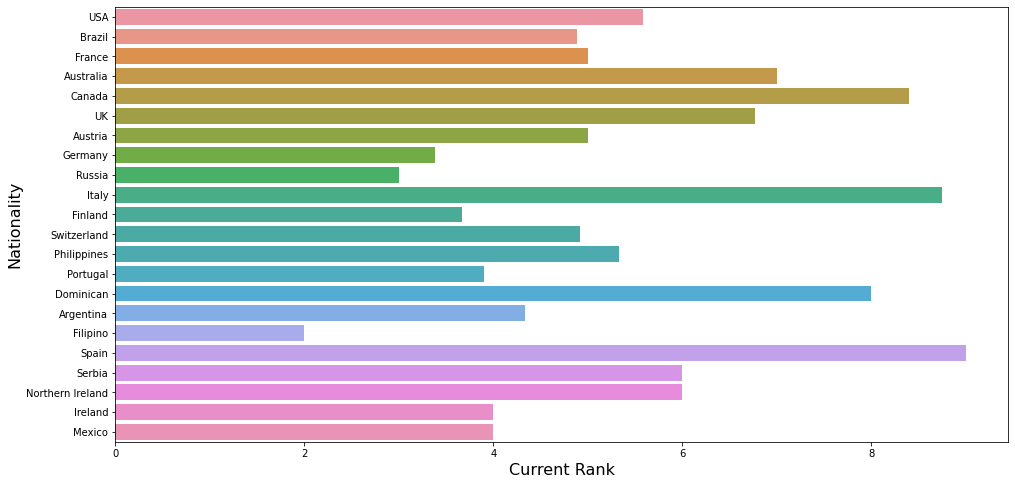

In [78]:
rank_data_df = data[['Nationality','Current Rank']]

plt.figure(figsize=(16, 8))
ax = sns.barplot(x="Current Rank", y="Nationality", data=rank_data_df, ci=None)

plt.xlabel('Current Rank', fontsize=16)
plt.ylabel('Nationality', fontsize=16)
plt.show()

Insights:

#### In 2020:

1. Overall Spain, Italy and Canada have the highest rank.
2. UK, Dominican and Australia have the second highest rank.
3. The lowest rank have Filipino, Russia, Germany, Finland and Portugal.

### column: Previous Year Rank

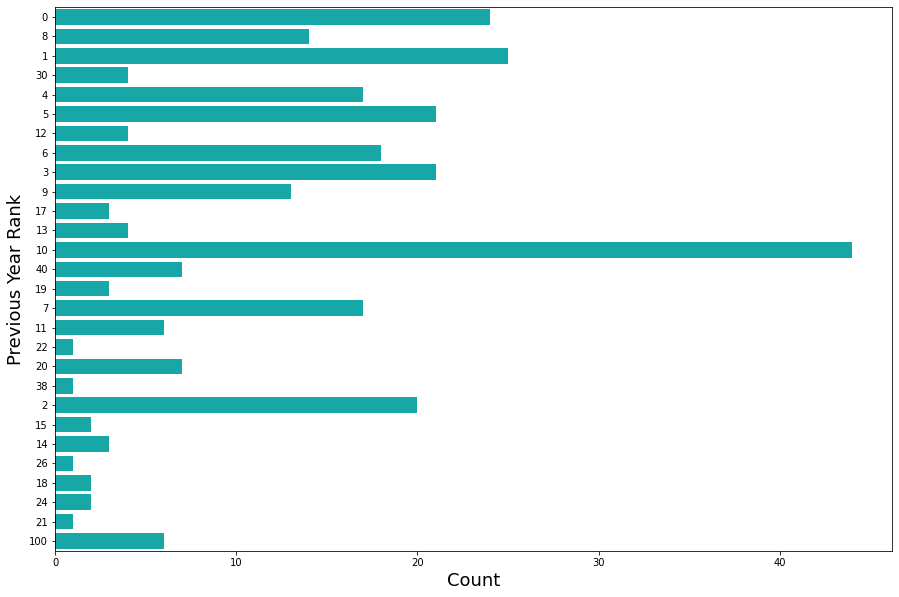

In [79]:
prev_rank_data = data[['Nationality','Previous Year Rank']].value_counts()

f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="Previous Year Rank", data=data, color='c')

plt.xlabel('Count', fontsize=18)
plt.ylabel('Previous Year Rank', fontsize=18)

plt.show()

Insights:

1. For the previous year the leader is the USA.
2. The second is Germany and the 3rd is Switzerland.

### column: Sport

In [80]:
sport = data['Sport'].value_counts()

fig = px.pie(sport.value_counts(),
            values=sport.values,
            names=sport.index,
            color_discrete_sequence=px.colors.sequential.Turbo)

fig.update_traces(textposition='inside',
                 textinfo='percent+label',
                 marker=dict(line=dict(color='white', width=3)))

fig.show()

Insights:

1. Most popular type of sport is Basketball.
2. The second popular type is Soccer aka Football.
3. Next popular types are Golf and Boxing.
4. The least popular types are MMM, Hockey and Cycling.

### column: Name

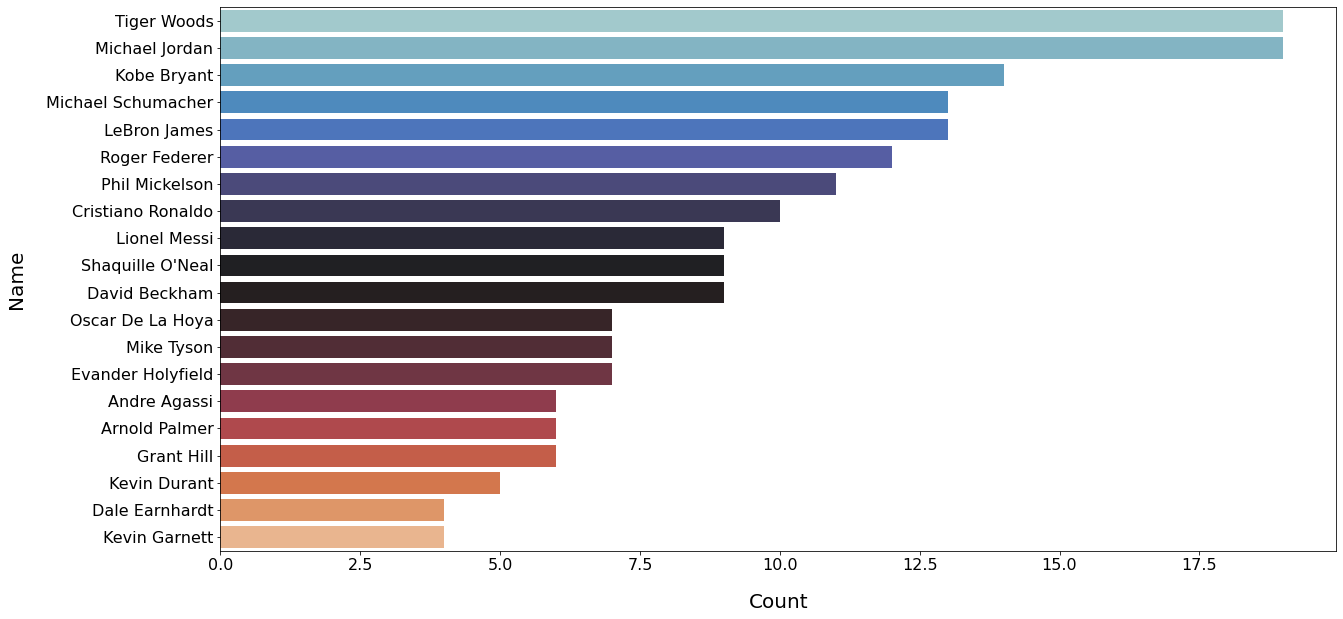

In [81]:
names = data['Name'].value_counts()[:20]

names_df = pd.DataFrame(list(names.items()), columns=['Name', 'Count'])

plt.figure(figsize=(20, 10))

sns.barplot(data=names_df,
           x='Count',
            y='Name',
           palette="icefire")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel('Count', fontsize=20, labelpad=20)
plt.ylabel('Name', fontsize=20, labelpad=20)

plt.show()


Insights:

1. So from 1990 to 2020 most 3 popular athletes are Michael Jordan, Tiger Woods and Kobe Bryant.
2. The second 3 popular athletes are LeBron James, Michael Schumacher and Roger Federer.
3. Tha last 3 place taken by Kevin Durant, Kevin Garnett and Spehen Curry.


### Relationship: Athletes and Earnings

In [82]:
top_earning_athletes = data.groupby('Name')['earnings ($ million)'].mean().sort_values(ascending=False)[:16]

top_earning_athletes_df = pd.DataFrame(list(top_earning_athletes.items()), columns=['Name', 'Average earnings ($ million)'])

fig = px.bar(top_earning_athletes_df, x='Name', y='Average earnings ($ million)', title='Top 15 richest athletes by name')

fig.show()

Insights:

1. The richest athlete is Floyd Mayweather with 108million earnings in average.
2. The 15th is Novak Djokovic with 55million in average.

### Relationship: Country and Earnings

In [83]:
nat_earnings = data.groupby('Nationality')['earnings ($ million)'].mean().sort_values(ascending=False)[:16]

nat_earnings_df = pd.DataFrame(list(nat_earnings.items()), columns=['Nationality', 'Average earnings ($ million)'])

fig = px.bar(nat_earnings_df, x='Nationality', y='Average earnings ($ million)', title='Top 15 richest athletes by nationality')

fig.show()

### Relationship: Sport type and Earnings

In [88]:
top_earning_sport_type = data.groupby('Sport')['earnings ($ million)'].mean().sort_values(ascending=False)[:16]

top_earning_sport_type_df = pd.DataFrame(list(top_earning_sport_type.items()), columns=['Sport', 'Average earnings ($ million)'])

fig = px.bar(top_earning_sport_type_df, x='Sport', y='Average earnings ($ million)', title='Top 15 richest athletes by sport type')

fig.show()

Insights:

1. MMA (Mixed Martial Arts) is the leader.
2. The second is football.
3. The 3rd is Boxing.
4. Last place (in top 15) has Hockey.